<a href="https://colab.research.google.com/github/sleepygirlleen/Machine-Learning-Terapan/blob/main/MT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyek Machine Learning Terapan 1**

- **Nama:** Sulistiani
- **Email:** lisasa2lilisa@gmail.com
- **ID Dicoding:** hi_itslizeu

## **Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from typing import Dict, List, Tuple
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

## **Import Dataset**

In [3]:
# Import dataset
df = pd.read_csv('student_habits_performance.csv')

## **Assessing Data**

In [4]:
# Menampilkan ukuran dataset
df.shape

(1000, 16)

In [5]:
# Menampilkan dataset
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
# Informasi Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

**Insight:**
- Dataset terdiri dari 1000 baris dan 14 kolom
- Dataset terdiri dari kolom atudent_id, age, gender, study_hours_per_day, social_media_hours, netflix_hours, part_time_job, attendance_percentage, sleep_hours, diet_quality, exercise frequency, parental_education_level, internet_quality, mental_health_rating, extracurricular_participation, dan exam_score

## **Checking Missing Values**

In [7]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


**Insight;**
- Terdapat 91 missing value pada kolom 'parental_education_level'

## **Cleaning Data**

In [8]:
# Hapus kolom yang tidak diperlukan

df.drop(columns=['student_id', 'social_media_hours', 'netflix_hours', 'part_time_job', 'parental_education_level', 'extracurricular_participation', 'internet_quality', 'diet_quality'], inplace=True)

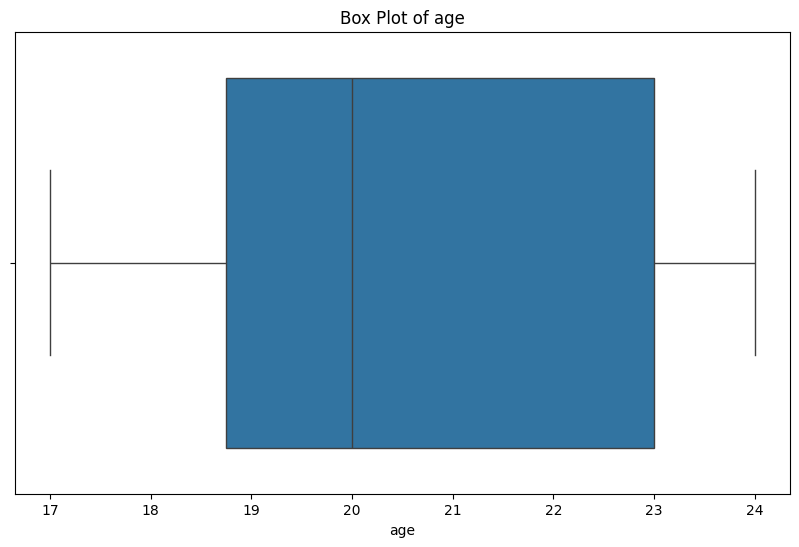

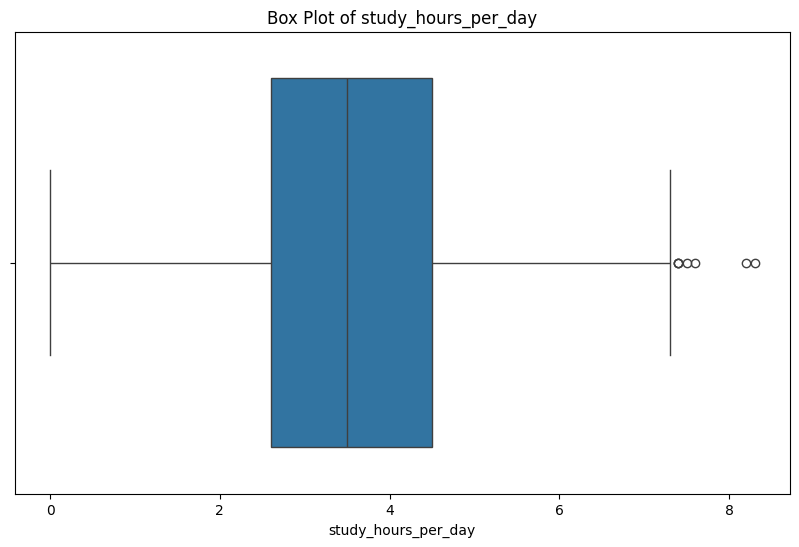

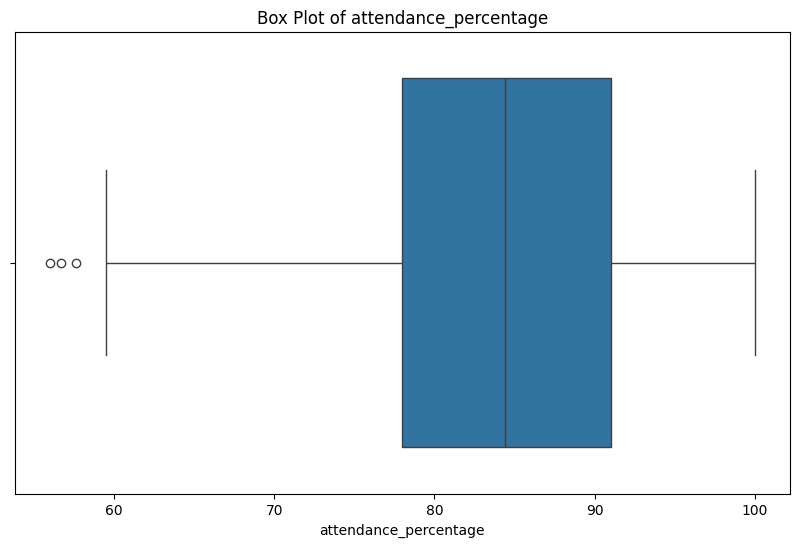

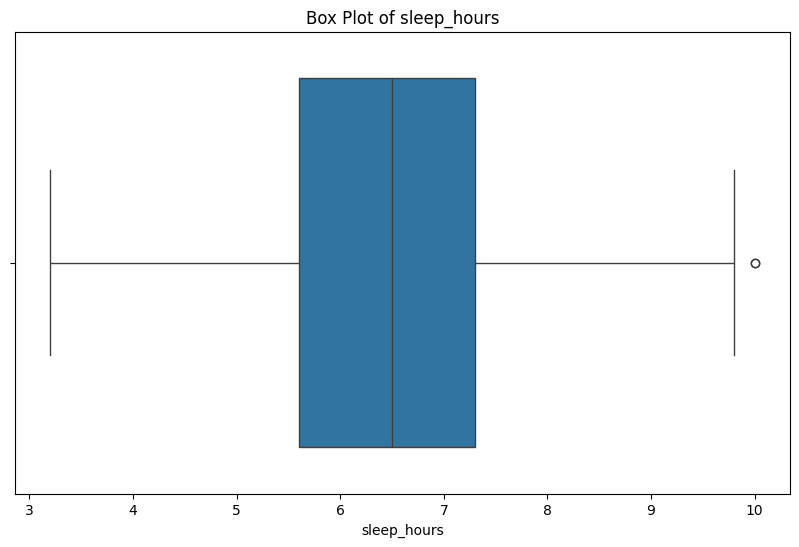

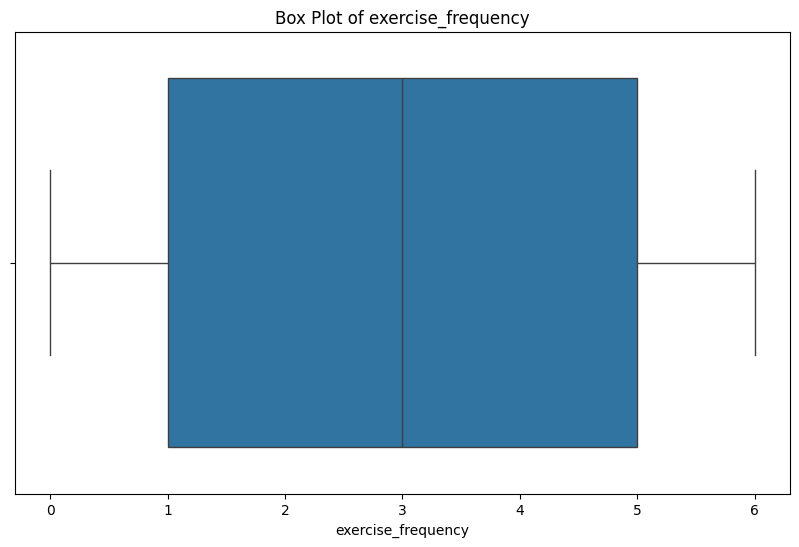

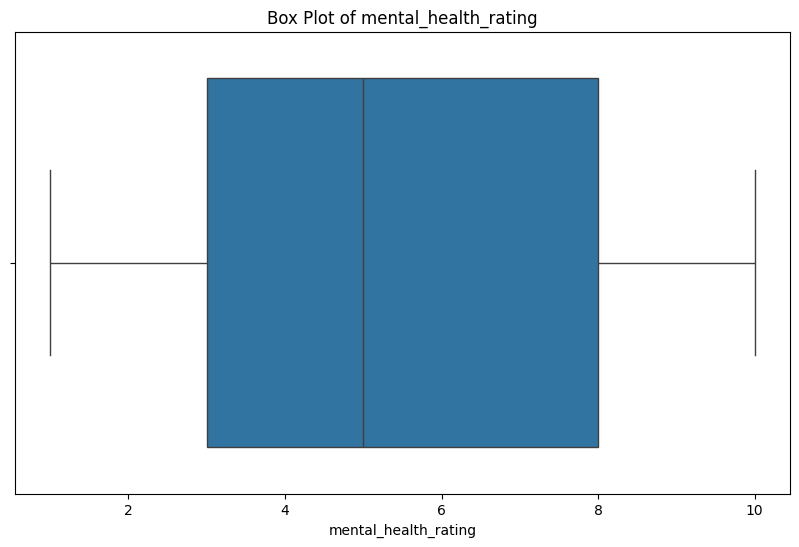

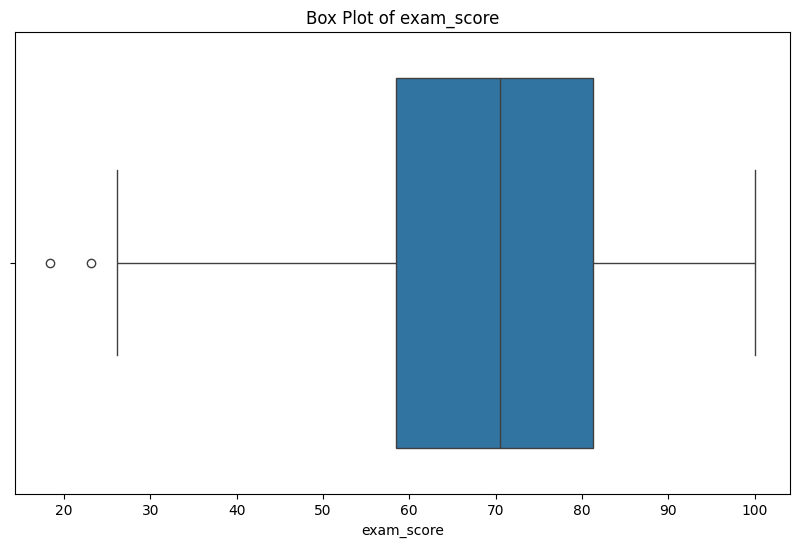

In [9]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [10]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

**Insight:**
- Menghapus kolom 'student_id', 'social_media_hours', 'netflix_hours', 'part_time_job', 'parental_education_level', 'extracurricular_participation', 'internet_quality', 'diet_quality'
-  Melakukan IQR untuk mendeteksi outlier

### **Data Transformation**

In [12]:
df['study_bin'] = pd.cut(df['study_hours_per_day'],
                         bins=[-0.1, 0, 1, 3, 5, 8, 12],
                         labels=['0', '<=1', '1–3', '3–5', '5–8', '>8'])

**Insight:**

- Melakukan binning pada kolom 'study_hours_per_day'. Dengan detail sebagai berikut:
  - 0: Tidak belajar sama sekali
  - <=1: Belajar sangat singkat
  - 1–3: Waktu belajar singkat - moderat
  - 3–5: Umumnya cukup intensif
  - 5–8: Sangat intensif
  - Lebih dari 8: Terlalu lama

# **Exploratory Data Analysis**

In [13]:
mental_health = df.groupby('mental_health_rating')[['exam_score']].mean()
print(mental_health)

                      exam_score
mental_health_rating            
1                      62.759406
2                      63.207527
3                      63.785437
4                      65.957407
5                      66.430612
6                      70.882075
7                      73.994382
8                      74.447115
9                      76.620930
10                     77.727551


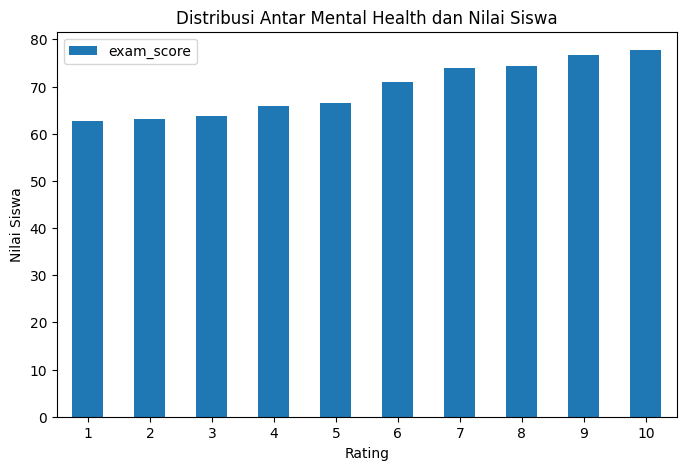

In [14]:
mental_health.plot(kind='bar', figsize=(8, 5))
plt.title('Distribusi Antar Mental Health dan Nilai Siswa')
plt.xlabel('Rating')
plt.ylabel('Nilai Siswa')
plt.xticks(rotation=0)
plt.show()


In [15]:
sleep = df.groupby('sleep_hours')[['exam_score']].mean()

sleep = sleep.reset_index()

sleep['sleep_bin'] = pd.cut(sleep['sleep_hours'],
                            bins=[0, 4.99, 6.99, 8.99, 24],
                            labels=['<5', '5–6', '7–8', '9+'])

grouped = sleep.groupby('sleep_bin')['exam_score'].mean().reset_index()

print(grouped)

  sleep_bin  exam_score
0        <5   63.447909
1       5–6   68.758102
2       7–8   71.412745
3        9+   69.835185


<ipython-input-15-428d4752ea41>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sleep.groupby('sleep_bin')['exam_score'].mean().reset_index()


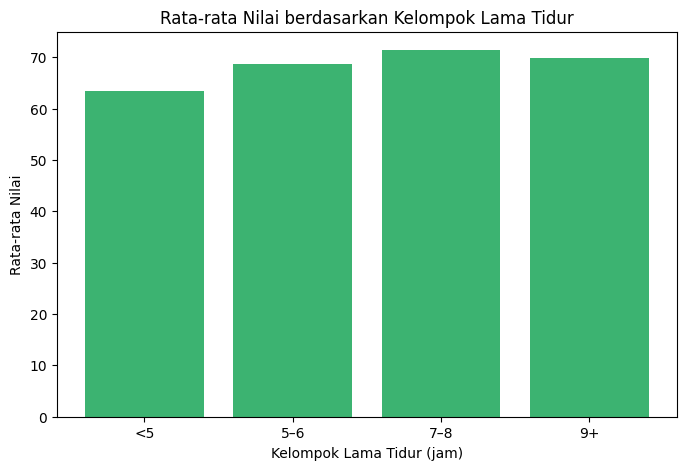

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(grouped['sleep_bin'], grouped['exam_score'], color='mediumseagreen')
plt.title('Rata-rata Nilai berdasarkan Kelompok Lama Tidur')
plt.xlabel('Kelompok Lama Tidur (jam)')
plt.ylabel('Rata-rata Nilai')
plt.show()

In [17]:
study = df.groupby('study_bin')[['exam_score']].mean()
print(study)

           exam_score
study_bin            
0           40.807692
<=1         41.031034
1–3         56.574522
3–5         73.876556
5–8         90.374324
>8                NaN


<ipython-input-17-f93b90410be7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study = df.groupby('study_bin')[['exam_score']].mean()


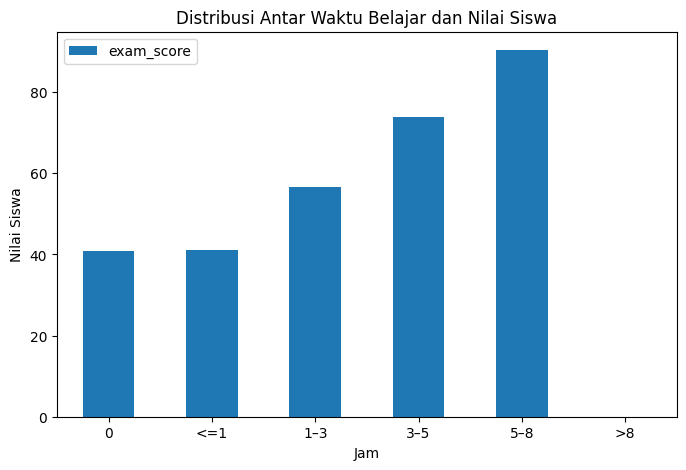

In [18]:
study.plot(kind='bar', figsize=(8, 5))
plt.title('Distribusi Antar Waktu Belajar dan Nilai Siswa')
plt.xlabel('Jam')
plt.ylabel('Nilai Siswa')
plt.xticks(rotation=0)
plt.show()


In [19]:
exercise = df.groupby('exercise_frequency')[['exam_score']].mean()
print(exercise)

                    exam_score
exercise_frequency            
0                    66.377305
1                    66.132414
2                    70.103333
3                    67.849333
4                    68.627820
5                    72.388356
6                    74.399338


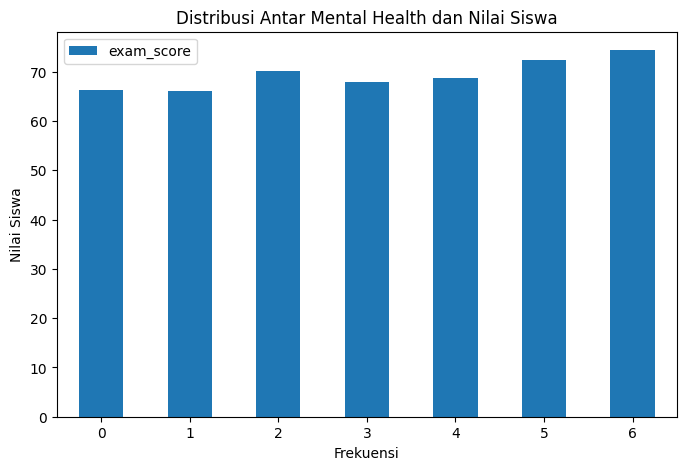

In [20]:
exercise.plot(kind='bar', figsize=(8, 5))
plt.title('Distribusi Antar Mental Health dan Nilai Siswa')
plt.xlabel('Frekuensi')
plt.ylabel('Nilai Siswa')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Terdapat tren positif yang jelas antara mental health rating dan nilai ujian. Semakin bagus kesehatan mental siswa, maka semakin tinggi pula nilai ujian yang didapat.
- Siswa yang durasi tidurnya 7-8 jam cenderung memiliki performa akademik yang optimal
- Terdapat korelasi positif antara waktu belajar siswa dan nilai ujian yang didapatkan. Siswa yang belajar 5-8 jam memiliki nilai tertinggi
- Faktor olahraga juga dapat mempengaruhi nilai ujian. Siswa yang memiliki nilai tertinggi ditemukan pada kelompok yang berolahraga 6 kali seminggu

## **Data Splitting**

In [21]:
# Variabel independen (fitur)
X = df[['mental_health_rating', 'sleep_hours', 'exercise_frequency', 'study_hours_per_day']]

# Variabel dependen
y = df[['exam_score']]

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Insight:**
- Memisahkan fitur menjadi dua bagian, yaitu data latih dan data uji dengan proporsi 80:20.
- Variabel independen yang digunakan adalah 'mental_health_rating', 'sleep_hours', 'exercise_frequency', 'study_hours_per_day'
- Variabel dependen yang digunakan adalah 'exam_score'
- Dilakukan standarisasi nilai data menggunakan standard scaler

# **Random Forest**

## **Pengembangan Model Random Forest**

In [24]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## **Evaluasi Model Random Forest**

In [29]:
model_name = "Random Forest"
y_true = y_test

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== Evaluasi {model_name} ===")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")

# ===== Evaluasi Random Forest =====
evaluate_model(y_test, y_pred, "Random Forest")


=== Evaluasi Random Forest ===
MAE: 5.7291
MSE: 49.7739
RMSE: 7.0551
R2 Score: 0.8076


# **Decision Tree**

## **Pengembangan Model Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi dan latih model
dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt.predict(X_test)

## **Evaluasi Model Decision Tree**

In [33]:
model_name = "Decision Tree"
y_true = y_test

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== Evaluasi {model_name} ===")
    print(f"MAE: {mean_absolute_error(y_true, y_pred_dt):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred_dt):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred_dt)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred_dt):.4f}")

# ===== Evaluasi Decision Tree =====
evaluate_model(y_test, y_pred, "Decision Tree")


=== Evaluasi Decision Tree ===
MAE: 7.4388
MSE: 89.9373
RMSE: 9.4835
R2 Score: 0.6524


# **Linear Regression**

## **Pengembangan Model Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression

# Inisialisasi dan latih model
lr = LinearRegression(n_jobs=-1, positive=True)
lr.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr.predict(X_test)

## **Evaluasi Model Linear Regression**

In [35]:
model_name = "Linear Regression"
y_true = y_test

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== Evaluasi {model_name} ===")
    print(f"MAE: {mean_absolute_error(y_true, y_pred_lr):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred_lr):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred_lr)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred_lr):.4f}")

# ===== Evaluasi Random Forest =====
evaluate_model(y_test, y_pred_lr, "Random Forest")


=== Evaluasi Random Forest ===
MAE: 5.3687
MSE: 43.6309
RMSE: 6.6054
R2 Score: 0.8314


# **Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import GridSearchCV

# 1. Membuat custom scoring untuk semua metrik
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
}

# 2. Fungsi untuk menampilkan hasil tuning
def print_tuning_results(grid_search):
    print(f"Best Parameters: {grid_search.best_params_}")
    cv_results = grid_search.cv_results_

    # Ambil hasil terbaik
    best_index = grid_search.best_index_
    metrics = {
        'MAE': -cv_results[f'mean_test_MAE'][best_index],
        'MSE': -cv_results[f'mean_test_MSE'][best_index],
        'RMSE': cv_results[f'mean_test_RMSE'][best_index],
        'R2': cv_results[f'mean_test_R2'][best_index]
    }

    # Tampilkan dalam tabel
    results_df = pd.DataFrame([metrics], index=['Best Model'])
    print("\nPerformance Metrics:")
    print(results_df.round(4))

    return metrics

# 3. Linear Regression Tuning
print("\n" + "="*50)
print(" LINEAR REGRESSION TUNING ")
print("="*50)
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring=scoring, refit='MSE')
grid_lr.fit(X_train, y_train)
lr_metrics = print_tuning_results(grid_lr)

# 4. Random Forest Tuning
print("\n" + "="*50)
print(" RANDOM FOREST TUNING ")
print("="*50)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_leaf': [1, 3]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf,
                      cv=5, scoring=scoring, refit='MSE', n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_metrics = print_tuning_results(grid_rf)

# 5. Decision Tree Tuning
print("\n" + "="*50)
print(" DECISION TREE TUNING ")
print("="*50)
param_grid_dt = {
    'max_depth': [5, 8, 10],
    'min_samples_split': [5, 10],
    'ccp_alpha': [0, 0.01]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt,
                     cv=5, scoring=scoring, refit='MSE')
grid_dt.fit(X_train, y_train)
dt_metrics = print_tuning_results(grid_dt)

# 6. Tabel Perbandingan Final
print("\n" + "="*50)
print(" FINAL MODEL COMPARISON ")
print("="*50)
comparison = pd.DataFrame([lr_metrics, rf_metrics, dt_metrics],
                         index=['Linear Regression', 'Random Forest', 'Decision Tree'])
print(comparison.round(4))


 LINEAR REGRESSION TUNING 
Best Parameters: {'fit_intercept': True, 'positive': True}

Performance Metrics:
               MAE      MSE    RMSE      R2
Best Model  5.3015  44.7317  6.6797  0.8371

 RANDOM FOREST TUNING 


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 200}

Performance Metrics:
               MAE      MSE    RMSE      R2
Best Model  5.7445  51.7849  7.1772  0.8124

 DECISION TREE TUNING 
Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 5, 'min_samples_split': 10}

Performance Metrics:
               MAE      MSE    RMSE    R2
Best Model  6.8242  71.7488  8.4535  0.74

 FINAL MODEL COMPARISON 
                      MAE      MSE    RMSE      R2
Linear Regression  5.3015  44.7317  6.6797  0.8371
Random Forest      5.7445  51.7849  7.1772  0.8124
Decision Tree      6.8242  71.7488  8.4535  0.7400
